In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import glob,os

In [4]:
ridership=gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/results/score.shp')

bus_num=gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/dbscan100_new.shp')
 #calculate the bus stop number
bus_num2=bus_num[bus_num['CLUSTER_ID']!=-1].groupby(['CLUSTER_ID']).size().reset_index()
bus_num2=bus_num2.rename(columns={0:'bus_stop_num'})
bus_num2['CLUSTER_ID']=bus_num2['CLUSTER_ID']-1


In [5]:
result2=pd.merge(ridership,bus_num2,how='left',on='CLUSTER_ID')
result2['bus_stop_num']=result2['bus_stop_num'].fillna(1)
result2=result2.rename(columns={'Shape_Leng':'sidewalk'})

In [6]:
result2

,all_microt,TARGET_FID,All_scoote,TARGET_F_1,inner_micr,CLUSTER_ID,ORIG_FID,Route,total_trip,Total_Acti,...,lon,Shape_Le_1,Shape_Area,lat_1,lon_1,microtran,bus_stop_n,score,geometry,bus_stop_num
0,0,0,6448,1,0.0,1.0,1.0,8.0,1235.0,1829.0,...,0.0,0.099152,0.000775,0.0,0.0,0.0,2.0,27.178828,"POLYGON ((-82.38642 29.61052, -82.38759 29.610...",2.0
1,0,1,5108,2,0.0,2.0,2.0,8.0,1230.0,124.0,...,0.0,0.099078,0.000774,0.0,0.0,0.0,2.0,23.783540,"POLYGON ((-82.38514 29.60859, -82.38630 29.608...",2.0
2,0,2,6651,3,0.0,3.0,3.0,8.0,1230.0,42.0,...,0.0,0.097762,0.000755,0.0,0.0,0.0,2.0,24.090926,"POLYGON ((-82.38287 29.60857, -82.38404 29.608...",2.0
3,0,3,10032,4,0.0,4.0,4.0,4.0,338.0,51.0,...,0.0,0.098380,0.000764,0.0,0.0,0.0,2.0,20.321716,"POLYGON ((-82.38073 29.60944, -82.38189 29.609...",2.0
4,0,4,13151,5,0.0,5.0,5.0,2.0,300.0,77.0,...,0.0,0.098995,0.000773,0.0,0.0,0.0,2.0,17.960279,"POLYGON ((-82.37550 29.60936, -82.37667 29.609...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0,623,46031,624,0.0,-1.0,220.0,1.0,44.0,15.0,...,0.0,0.097347,0.000749,0.0,0.0,0.0,1.0,23.617730,"POLYGON ((-82.36155 29.65501, -82.36038 29.654...",1.0
624,0,624,0,625,0.0,-1.0,221.0,1.0,68.0,6.0,...,0.0,0.097330,0.000748,0.0,0.0,0.0,1.0,24.206828,"POLYGON ((-82.43880 29.62163, -82.43763 29.621...",1.0
625,0,625,996,626,0.0,-1.0,222.0,2.0,30.0,3.0,...,0.0,0.097347,0.000749,0.0,0.0,0.0,1.0,26.068607,"POLYGON ((-82.40534 29.65450, -82.40417 29.654...",1.0
626,0,626,0,627,0.0,-1.0,223.0,1.0,18.0,25.0,...,0.0,0.097341,0.000749,0.0,0.0,0.0,1.0,18.989125,"POLYGON ((-82.43640 29.64282, -82.43523 29.642...",1.0


In [7]:
ridership=result2[['TARGET_FID', 'Route', 'total_trip', 'Total_Acti',
       'W_C_TOTAL', 'BIKE_TOTAL','inner_micr','inner_scoo', 'bike', 'bike_osm',
       'sidewalk', 'sidewalk_o', 'bus_stop_num','geometry']]

In [8]:
#update with new data: Multimodal 4-leg 

folder_path = 'C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/road/updated_epa/epa_join'

shapefile_list = [file for file in os.listdir(folder_path) if file.endswith('.shp')]

merged_gdf4 = gpd.GeoDataFrame()

for shapefile in shapefile_list:
    gdf = gpd.read_file(os.path.join(folder_path, shapefile))
    #print(shapefile)
    merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf4 = merged_gdf4.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1229573263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m

In [9]:
new_values=merged_gdf4.groupby(['FID_result'])['D3BMM4', 'D3BPO4', 'D5AR', 'D5BR'].mean().reset_index()

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\3128068744.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_values=merged_gdf4.groupby(['FID_result'])['D3BMM4', 'D3BPO4', 'D5AR', 'D5BR'].mean().reset_index()


In [10]:
new_values

,FID_result,D3BMM4,D3BPO4,D5AR,D5BR
0,0,1.665422,7.801587,22187.538462,27405.461538
1,1,1.804208,7.981768,22491.333333,26381.166667
2,2,1.546464,8.260536,22511.500000,28970.785714
3,3,1.439213,7.312497,22459.846154,28158.461538
4,4,1.100575,7.736847,23526.235294,34472.823529
...,...,...,...,...,...
623,623,4.360459,24.530909,26262.687500,49064.312500
624,624,1.880762,10.264675,12182.000000,-34221.400000
625,625,2.690513,7.562823,19486.923077,23260.769231
626,626,1.706429,9.345266,13611.571429,-52614.000000


In [11]:
final2 = pd.merge(ridership,new_values,how='left',left_on='TARGET_FID',right_on='FID_result')

In [12]:
final2

,TARGET_FID,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL,inner_micr,inner_scoo,bike,bike_osm,sidewalk,sidewalk_o,bus_stop_num,geometry,FID_result,D3BMM4,D3BPO4,D5AR,D5BR
0,0,8.0,1235.0,1829.0,1942.0,401.0,0.0,2.0,59176.284796,0.308672,139018.127208,0.725138,2.0,"POLYGON ((-82.38642 29.61052, -82.38759 29.610...",0,1.665422,7.801587,22187.538462,27405.461538
1,1,8.0,1230.0,124.0,89.0,25.0,0.0,0.0,61730.211364,0.307015,148963.514871,0.740871,2.0,"POLYGON ((-82.38514 29.60859, -82.38630 29.608...",1,1.804208,7.981768,22491.333333,26381.166667
2,2,8.0,1230.0,42.0,45.0,18.0,0.0,0.0,64462.837124,0.305312,157668.202176,0.746757,2.0,"POLYGON ((-82.38287 29.60857, -82.38404 29.608...",2,1.546464,8.260536,22511.500000,28970.785714
3,3,4.0,338.0,51.0,135.0,46.0,0.0,0.0,55775.547095,0.255070,161345.973321,0.737860,2.0,"POLYGON ((-82.38073 29.60944, -82.38189 29.609...",3,1.439213,7.312497,22459.846154,28158.461538
4,4,2.0,300.0,77.0,66.0,70.0,0.0,88.0,52433.869256,0.259744,157721.959091,0.781316,4.0,"POLYGON ((-82.37550 29.60936, -82.37667 29.609...",4,1.100575,7.736847,23526.235294,34472.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,623,1.0,44.0,15.0,0.0,0.0,0.0,1.0,16232.044697,0.118557,86381.582874,0.630921,1.0,"POLYGON ((-82.36155 29.65501, -82.36038 29.654...",623,4.360459,24.530909,26262.687500,49064.312500
624,624,1.0,68.0,6.0,0.0,0.0,0.0,0.0,21425.712177,0.149381,94555.891407,0.659246,1.0,"POLYGON ((-82.43880 29.62163, -82.43763 29.621...",624,1.880762,10.264675,12182.000000,-34221.400000
625,625,2.0,30.0,3.0,6.0,2.0,0.0,4.0,27553.563166,0.189045,104575.537097,0.717491,1.0,"POLYGON ((-82.40534 29.65450, -82.40417 29.654...",625,2.690513,7.562823,19486.923077,23260.769231
626,626,1.0,18.0,25.0,2.0,8.0,0.0,0.0,30192.365629,0.280903,73258.216786,0.681577,1.0,"POLYGON ((-82.43640 29.64282, -82.43523 29.642...",626,1.706429,9.345266,13611.571429,-52614.000000


In [13]:
folder_path = 'C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/road/socioeconomic/tract'

shapefile_list = [file for file in os.listdir(folder_path) if file.endswith('.shp')]

merged_gdf = gpd.GeoDataFrame()

for shapefile in shapefile_list:
    gdf = gpd.read_file(os.path.join(folder_path, shapefile))
    
    merged_gdf = merged_gdf.append(gdf, ignore_index=True)

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf = merged_gdf.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\459886670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf 

In [14]:
df=merged_gdf.groupby(['FID_result'])['HISPANIC','TOTALPOP','HOUSEHOLDS','VEHICLE_0','BLACK','RENTER','AGE_65_UP','DIS_2064','S_NOTATALL','BELOW_POV'].sum().reset_index()

#update the values
#Delete bachelors, children, recalculate the index
#Replace with Hispanic, black population 
#percentage of people living in rental units

#new vars: HISPNC%, BLACK%, RENT%

df['HISPANIC%']=df['HISPANIC']*100/df['TOTALPOP']
df['VEHICLE_0%']=df['VEHICLE_0']*100/df['HOUSEHOLDS']
df['AGE_65_UP%']=df['AGE_65_UP']*100/df['TOTALPOP']
df['DIS_2064%']=df['DIS_2064']*100/df['TOTALPOP']
df['S_NOTATALL%']=df['S_NOTATALL']*100/df['TOTALPOP']
df['BELOW_POV%']=df['BELOW_POV']*100/df['TOTALPOP']
df['BLACK%']=df['BLACK']*100/df['TOTALPOP']
df['RENT%']=df['RENTER']*100/df['HOUSEHOLDS']

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\2396930944.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=merged_gdf.groupby(['FID_result'])['HISPANIC','TOTALPOP','HOUSEHOLDS','VEHICLE_0','BLACK','RENTER','AGE_65_UP','DIS_2064','S_NOTATALL','BELOW_POV'].sum().reset_index()


In [15]:
final3 =pd.merge(final2,df,how='left',left_on='TARGET_FID',right_on='FID_result')

In [16]:
merged_gdf= gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/fmlm/fmlm_spatialjoin.shp')
#should choose average value rather than the sum
fmlm2=merged_gdf.groupby(['TARGET_FID'])['FMLM_sco_1'].mean().reset_index()

In [17]:
#merge with fmlm score 
final4=pd.merge(final3,fmlm2,how='left',on='TARGET_FID').drop_duplicates()

In [18]:
final4

,TARGET_FID,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL,inner_micr,inner_scoo,bike,bike_osm,...,BELOW_POV,HISPANIC%,VEHICLE_0%,AGE_65_UP%,DIS_2064%,S_NOTATALL%,BELOW_POV%,BLACK%,RENT%,FMLM_sco_1
0,0,8.0,1235.0,1829.0,1942.0,401.0,0.0,2.0,59176.284796,0.308672,...,8854,16.588034,9.443675,7.456891,4.655338,0.242161,36.967141,17.231013,81.310632,0.084091
1,1,8.0,1230.0,124.0,89.0,25.0,0.0,0.0,61730.211364,0.307015,...,8204,16.393737,9.685919,6.832967,4.661492,0.260218,36.807394,18.439589,82.809865,0.127651
2,2,8.0,1230.0,42.0,45.0,18.0,0.0,0.0,64462.837124,0.305312,...,10925,15.968482,9.664011,5.768605,4.438501,0.278310,39.487476,17.670871,84.360928,0.103103
3,3,4.0,338.0,51.0,135.0,46.0,0.0,0.0,55775.547095,0.255070,...,10354,15.594002,10.196945,6.136101,4.605921,0.296040,39.807766,16.928105,84.069575,0.031949
4,4,2.0,300.0,77.0,66.0,70.0,0.0,88.0,52433.869256,0.259744,...,11614,16.021353,11.571081,4.606716,4.362869,0.253732,38.270669,15.092101,86.111344,0.032224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,623,1.0,44.0,15.0,0.0,0.0,0.0,1.0,16232.044697,0.118557,...,8822,16.167432,9.911526,3.355705,3.242670,0.194278,31.162134,10.466266,88.534194,0.000000
624,624,1.0,68.0,6.0,0.0,0.0,0.0,0.0,21425.712177,0.149381,...,906,7.119634,2.299517,13.907504,5.367925,0.484374,6.011545,13.157720,22.550725,0.150622
625,625,2.0,30.0,3.0,6.0,2.0,0.0,4.0,27553.563166,0.189045,...,6692,17.279378,8.704104,7.210791,5.176040,0.210334,30.598994,29.967993,81.835853,0.086042
626,626,1.0,18.0,25.0,2.0,8.0,0.0,0.0,30192.365629,0.280903,...,979,7.483933,2.256834,17.610667,4.240495,0.042045,5.880233,9.742327,21.837254,0.268545


In [19]:
#read all the walkscore files
folder_path = 'C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/access/walkscore'

shapefile_list = [file for file in os.listdir(folder_path) if file.endswith('.shp')]

merged_gdf5 = gpd.GeoDataFrame()

for shapefile in shapefile_list:
    gdf = gpd.read_file(os.path.join(folder_path, shapefile))
    #print(shapefile)
    merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_gdf5 = merged_gdf5.append(gdf, ignore_index=True)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\125062375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge

In [20]:
walkscore=merged_gdf5.groupby(['FID_update'])['Walkscore1'].mean().reset_index()

In [21]:
walkscore

,FID_update,Walkscore1
0,0,59.635135
1,1,59.946667
2,2,61.337500
3,3,60.612903
4,4,55.821429
...,...,...
623,623,37.836066
624,624,47.600000
625,625,17.684211
626,626,44.153846


In [23]:
final5=pd.merge(final4,walkscore,how='left',left_on='TARGET_FID',right_on='FID_update')

In [25]:
final5.columns

Index(['TARGET_FID', 'Route', 'total_trip', 'Total_Acti', 'W_C_TOTAL',
       'BIKE_TOTAL', 'inner_micr', 'inner_scoo', 'bike', 'bike_osm',
       'sidewalk', 'sidewalk_o', 'bus_stop_num', 'geometry', 'FID_result_x',
       'D3BMM4', 'D3BPO4', 'D5AR', 'D5BR', 'FID_result_y', 'HISPANIC',
       'TOTALPOP', 'HOUSEHOLDS', 'VEHICLE_0', 'BLACK', 'RENTER', 'AGE_65_UP',
       'DIS_2064', 'S_NOTATALL', 'BELOW_POV', 'HISPANIC%', 'VEHICLE_0%',
       'AGE_65_UP%', 'DIS_2064%', 'S_NOTATALL%', 'BELOW_POV%', 'BLACK%',
       'RENT%', 'FMLM_sco_1', 'FID_update', 'Walkscore1'],
      dtype='object')

In [24]:
final5

,TARGET_FID,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL,inner_micr,inner_scoo,bike,bike_osm,...,VEHICLE_0%,AGE_65_UP%,DIS_2064%,S_NOTATALL%,BELOW_POV%,BLACK%,RENT%,FMLM_sco_1,FID_update,Walkscore1
0,0,8.0,1235.0,1829.0,1942.0,401.0,0.0,2.0,59176.284796,0.308672,...,9.443675,7.456891,4.655338,0.242161,36.967141,17.231013,81.310632,0.084091,0,59.635135
1,1,8.0,1230.0,124.0,89.0,25.0,0.0,0.0,61730.211364,0.307015,...,9.685919,6.832967,4.661492,0.260218,36.807394,18.439589,82.809865,0.127651,1,59.946667
2,2,8.0,1230.0,42.0,45.0,18.0,0.0,0.0,64462.837124,0.305312,...,9.664011,5.768605,4.438501,0.278310,39.487476,17.670871,84.360928,0.103103,2,61.337500
3,3,4.0,338.0,51.0,135.0,46.0,0.0,0.0,55775.547095,0.255070,...,10.196945,6.136101,4.605921,0.296040,39.807766,16.928105,84.069575,0.031949,3,60.612903
4,4,2.0,300.0,77.0,66.0,70.0,0.0,88.0,52433.869256,0.259744,...,11.571081,4.606716,4.362869,0.253732,38.270669,15.092101,86.111344,0.032224,4,55.821429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,623,1.0,44.0,15.0,0.0,0.0,0.0,1.0,16232.044697,0.118557,...,9.911526,3.355705,3.242670,0.194278,31.162134,10.466266,88.534194,0.000000,623,37.836066
624,624,1.0,68.0,6.0,0.0,0.0,0.0,0.0,21425.712177,0.149381,...,2.299517,13.907504,5.367925,0.484374,6.011545,13.157720,22.550725,0.150622,624,47.600000
625,625,2.0,30.0,3.0,6.0,2.0,0.0,4.0,27553.563166,0.189045,...,8.704104,7.210791,5.176040,0.210334,30.598994,29.967993,81.835853,0.086042,625,17.684211
626,626,1.0,18.0,25.0,2.0,8.0,0.0,0.0,30192.365629,0.280903,...,2.256834,17.610667,4.240495,0.042045,5.880233,9.742327,21.837254,0.268545,626,44.153846


In [27]:
df=final5[[
       'inner_micr', 'Route', 'total_trip',
       'Total_Acti', 'W_C_TOTAL', 'BIKE_TOTAL', 'inner_scoo', 'HISPANIC%', 'VEHICLE_0%',
       'AGE_65_UP%', 'DIS_2064%', 'S_NOTATALL%', 'BELOW_POV%', 'BLACK%',
       'RENT%', 'bike',
       'bike_osm', 'sidewalk', 'sidewalk_o', 'FMLM_sco_1', 'bus_stop_num', 'Walkscore1','D3BMM4', 'D3BPO4', 'D5AR', 'D5BR']]

In [28]:
#normalize the selected columns and save to a new df
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = 100*(df[feature_name] - min_value) / (max_value - min_value)
    return result

In [29]:
df_norm=normalize(df)

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\1738189301.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_norm.hist(ax=axis)


array([[<AxesSubplot: title={'center': 'inner_micr'}>,
        <AxesSubplot: title={'center': 'Route'}>,
        <AxesSubplot: title={'center': 'total_trip'}>,
        <AxesSubplot: title={'center': 'Total_Acti'}>,
        <AxesSubplot: title={'center': 'W_C_TOTAL'}>],
       [<AxesSubplot: title={'center': 'BIKE_TOTAL'}>,
        <AxesSubplot: title={'center': 'inner_scoo'}>,
        <AxesSubplot: title={'center': 'HISPANIC%'}>,
        <AxesSubplot: title={'center': 'VEHICLE_0%'}>,
        <AxesSubplot: title={'center': 'AGE_65_UP%'}>],
       [<AxesSubplot: title={'center': 'DIS_2064%'}>,
        <AxesSubplot: title={'center': 'S_NOTATALL%'}>,
        <AxesSubplot: title={'center': 'BELOW_POV%'}>,
        <AxesSubplot: title={'center': 'BLACK%'}>,
        <AxesSubplot: title={'center': 'RENT%'}>],
       [<AxesSubplot: title={'center': 'bike'}>,
        <AxesSubplot: title={'center': 'bike_osm'}>,
        <AxesSubplot: title={'center': 'sidewalk'}>,
        <AxesSubplot: title={'cen

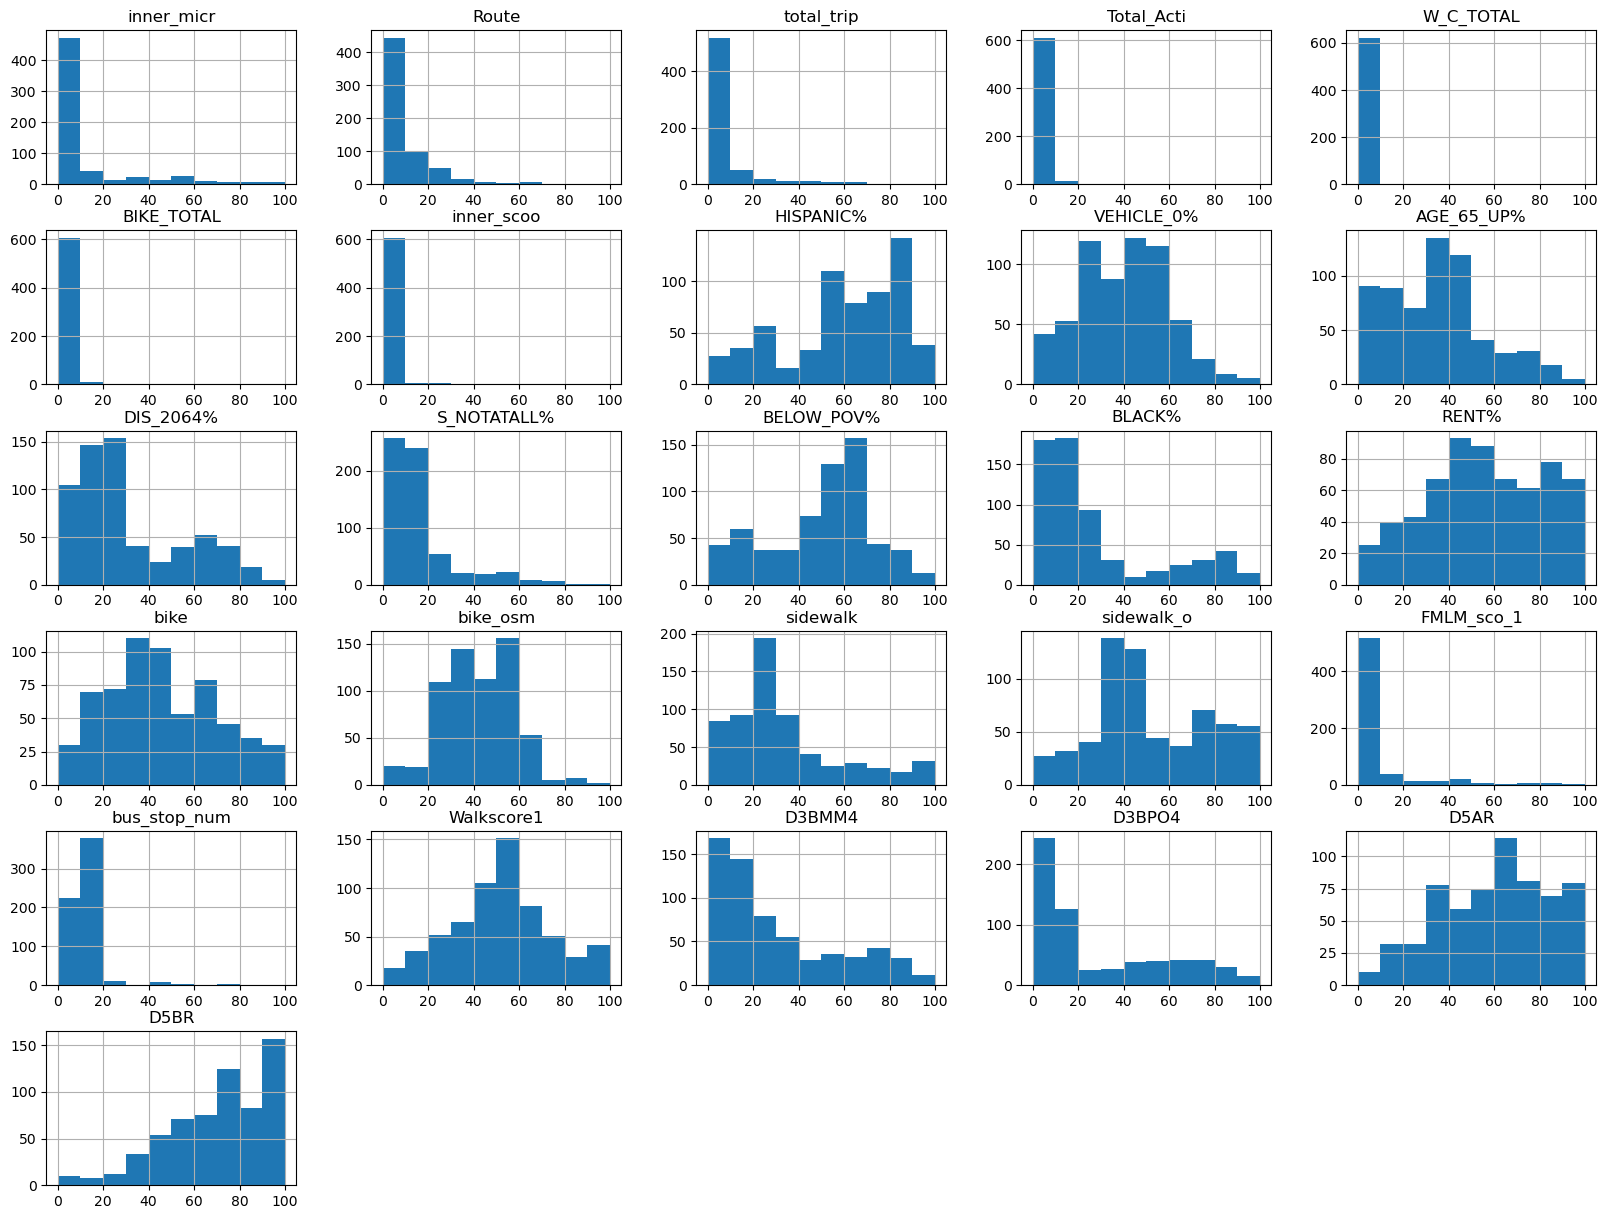

In [30]:
import matplotlib.pyplot as plt
fig, axis=plt.subplots( figsize=(20,15))
df_norm.hist(ax=axis)

In [31]:
df_norm.columns

Index(['inner_micr', 'Route', 'total_trip', 'Total_Acti', 'W_C_TOTAL',
       'BIKE_TOTAL', 'inner_scoo', 'HISPANIC%', 'VEHICLE_0%', 'AGE_65_UP%',
       'DIS_2064%', 'S_NOTATALL%', 'BELOW_POV%', 'BLACK%', 'RENT%', 'bike',
       'bike_osm', 'sidewalk', 'sidewalk_o', 'FMLM_sco_1', 'bus_stop_num',
       'Walkscore1', 'D3BMM4', 'D3BPO4', 'D5AR', 'D5BR'],
      dtype='object')

In [34]:
df_norm['ridership_index']=0.4*df_norm.Total_Acti+0.1*df_norm.W_C_TOTAL+0.1*df_norm.Route+0.1*df_norm.bus_stop_num+0.3*df_norm.total_trip
df_norm['FMLM_index']=0.15*df_norm.inner_micr+0.15*df_norm.inner_scoo+0.15*df_norm.BIKE_TOTAL+0.55*df_norm.FMLM_sco_1
df_norm['infast_index']=0.16*(df_norm.bike_osm+df_norm.bike+df_norm.sidewalk_o+df_norm.sidewalk+df_norm.D3BMM4+df_norm.D3BPO4)
df_norm['socio_index']=0.125*(df_norm['HISPANIC%']+df_norm['VEHICLE_0%']+df_norm['AGE_65_UP%']+df_norm['DIS_2064%']+df_norm['S_NOTATALL%']+df_norm['BELOW_POV%']+df_norm['BLACK%']+df_norm['RENT%'])
df_norm['access_index']=0.25*(df_norm.D5AR+df_norm.D5BR)+0.5*df_norm.Walkscore1

df_norm['score']=0.2*(df_norm['ridership_index']+df_norm['FMLM_index']+df_norm['infast_index']+df_norm['socio_index']+df_norm['access_index'])

In [35]:
df_norm

,inner_micr,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL,inner_scoo,HISPANIC%,VEHICLE_0%,AGE_65_UP%,...,D3BMM4,D3BPO4,D5AR,D5BR,ridership_index,FMLM_index,infast_index,socio_index,access_index,score
0,0.0,28.0,27.274760,26.422999,44.901734,23.854848,0.063032,92.458664,35.797473,18.693003,...,8.408677,8.080251,57.437899,76.503156,27.470372,4.430432,38.633601,44.726861,68.781147,36.808483
1,0.0,28.0,27.162978,1.791390,2.057803,1.487210,0.000000,91.221358,36.978991,16.503486,...,9.109400,8.325780,59.181867,75.616175,13.299801,1.502391,39.871577,44.994998,69.193034,33.772360
2,0.0,28.0,27.162978,0.606761,1.040462,1.070791,0.000000,88.513287,36.872137,12.768356,...,7.808057,8.705653,59.297636,77.858638,12.724215,1.193907,40.712567,44.971664,70.664961,34.053463
3,0.0,12.0,7.221104,0.736781,3.121387,2.736466,0.000000,86.128554,39.471455,14.057999,...,7.266551,7.413775,59.001112,77.155212,5.401754,0.730662,36.815024,45.363412,69.955276,31.653226
4,0.0,4.0,6.371563,1.112395,1.526012,4.164188,2.773401,88.849974,46.173636,8.690975,...,5.556775,7.992030,65.122836,82.623090,7.194742,1.363589,36.248532,44.913997,69.812884,31.906749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0.0,0.0,0.648334,0.216700,0.000000,0.000000,0.031516,89.780222,38.079359,4.300843,...,22.015851,30.877040,80.831743,95.258490,0.281180,0.004727,25.281417,39.371384,65.488738,26.085489
624,0.0,0.0,1.184887,0.086680,0.000000,0.000000,0.000000,32.162778,0.952719,41.329929,...,9.495923,11.436662,0.000000,23.137799,0.390138,1.509513,22.962603,17.848558,33.445036,15.231170
625,0.0,4.0,0.335345,0.043340,0.138728,0.118977,0.126064,96.861226,32.190306,17.829372,...,13.584333,7.754891,41.934718,72.914088,0.531812,0.899062,26.674187,45.572144,37.393699,22.214181
626,0.0,0.0,0.067069,0.361167,0.046243,0.475907,0.000000,34.482679,0.744538,54.325318,...,8.615720,10.183799,8.206613,7.210853,0.169212,2.762711,28.267979,14.980025,29.328654,15.101716


In [36]:
df_norm['score'].describe()

count    628.000000
mean      29.276587
std        7.879874
min        7.322268
25%       23.506543
50%       29.351231
75%       34.689702
max       54.803233
Name: score, dtype: float64

In [38]:
result2=final5[['TARGET_FID','geometry']]
score_df=pd.concat([result2,df_norm],axis=1)
score_df.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/results/updated_score/new_score2.shp')

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_3464\904192789.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  score_df.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/results/updated_score/new_score2.shp')
